In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import cm
import time
import itertools

In [2]:
datasetPath = "dataku.txt"
dataset = np.loadtxt(datasetPath, delimiter=" ")

In [3]:
# Mendefinisikan parameter k-means klustering
k = 2 #jumlah cluster yg di inginkan
iterationCounter = 0 #counter untuk iterasi
input = dataset
initCentroidMethod = "badInit"

In [4]:
def initCentroid(dataIn, method, k):
    if (method=="random"):
        result = dataIn[np.random.choice(dataIn.shape[0], k, replace=False)]
    if (method=="kmeans++"):
        euclideanMatrixAllCentroid = np.ndarray(shape=(dataIn.shape[0], 0))
        allCentroid = np.ndarray(shape=(0,dataIn.shape[1]))
        first = dataIn[np.random.choice(dataIn.shape[0], 1, replace=False)]
        allCentroid = np.concatenate((allCentroid, first), axis=0)
        repeatedCent = np.repeat(first, dataIn.shape[0], axis=0)
        deltaMatrix = abs(np.subtract(dataIn, repeatedCent))
        euclideanMatrix = np.sqrt(np.square(deltaMatrix).sum(axis=1))
        indexNextCent = (np.argmax(np.matrix(euclideanMatrix)))
        if(k>1):
            for a in range(1,k):
                nextCent = np.matrix(dataIn[np.asscalar(indexNextCent),:])
                allCentroid = np.concatenate((allCentroid, nextCent), axis=0)
                for i in range(0,allCentroid.shape[0]):
                    repeatedCent = np.repeat(allCentroid[i,:], dataIn.shape[0], axis=0)
                    deltaMatrix = abs(np.subtract(dataIn, repeatedCent))
                    euclideanMatrix = np.sqrt(np.square(deltaMatrix).sum(axis=1))
                    euclideanMatrixAllCentroid = \
                        np.concatenate((euclideanMatrixAllCentroid, euclideanMatrix), axis=1)
                euclideanFinal = np.min(np.matrix(euclideanMatrixAllCentroid), axis=1)
                indexNextCent = np.argmax(np.matrix(euclideanFinal))
        result = allCentroid
    if (method=="badInit"):
        allCentroid = np.ndarray(shape=(0,dataIn.shape[1]))
        firstIndex = np.random.randint(0,dataIn.shape[0])
        first = np.matrix(dataIn[firstIndex,:])
        dataIn = np.delete(dataIn, firstIndex, 0)
        allCentroid = np.concatenate((allCentroid, first), axis=0)
        repeatedCent = np.repeat(first, dataIn.shape[0], axis=0)
        deltaMatrix = abs(np.subtract(dataIn, repeatedCent))
        euclideanMatrix = np.sqrt(np.square(deltaMatrix).sum(axis=1))
        indexNextCent = (np.argmin(np.matrix(euclideanMatrix)))
        if(k>1):
            for a in range(1,k):
                nextCent = np.matrix(dataIn[np.asscalar(indexNextCent),:])
                dataIn = np.delete(dataIn, np.asscalar(indexNextCent), 0)
                euclideanMatrixAllCentroid = np.ndarray(shape=(dataIn.shape[0], 0))
                allCentroid = np.concatenate((allCentroid, nextCent), axis=0)
                for i in range(0,allCentroid.shape[0]):
                    repeatedCent = np.repeat(allCentroid[i,:], dataIn.shape[0], axis=0)
                    deltaMatrix = abs(np.subtract(dataIn, repeatedCent))
                    euclideanMatrix = np.sqrt(np.square(deltaMatrix).sum(axis=1))
                    euclideanMatrixAllCentroid = \
                        np.concatenate((euclideanMatrixAllCentroid, euclideanMatrix), axis=1)
                euclideanFinal = np.min(np.matrix(euclideanMatrixAllCentroid), axis=1)
                indexNextCent = np.argmin(np.matrix(euclideanFinal))
        result = allCentroid
    if (method=="zeroInit"):
        result = np.matrix(np.full((k,dataIn.shape[1]),0))

    color = iter(cm.rainbow(np.linspace(0, 1, k)))
    plt.figure("centroid initialization")
    plt.title("centroid initialization")
    plt.scatter(dataIn[:, 0], dataIn[:, 1], marker=".", s=100)
    for i in range(0,k):
        col = next(color)
        plt.scatter((result[i, 0]), (result[i, 1]), marker="*", s=400, c=col)
        plt.text((result[i, 0]), (result[i, 1]), str(i+1), fontsize=20)
    return result

In [5]:
def plotClusterResult(listClusterMembers, centroid, iteration, converged):
    n = listClusterMembers.__len__()
    color = iter(cm.rainbow(np.linspace(0, 1, n)))
    plt.figure("result")
    plt.clf()
    plt.title("iteration-" + iteration)
    for i in range(n):
        col = next(color)
        memberCluster = np.asmatrix(listClusterMembers[i])
        plt.scatter(np.ravel(memberCluster[:, 0]), np.ravel(memberCluster[:, 1]), marker=".", s=100, c=col)
        plt.scatter((centroid[i, 0]), (centroid[i, 1]), marker="*", s=400, c=col, edgecolors="black")
    if(converged == 0):
        plt.ion()
        plt.show()
        plt.pause(0.1)
    if (converged == 1):
        plt.show(block=True)

In [6]:
def kMeans(data, centroidInit):
    nCluster = centroidInit.shape[0]
    #looping until converged
    global iterationCounter
    centroidInit = np.matrix(centroidInit)
    while(True):
        iterationCounter +=1
        euclideanMatrixAllCluster = np.ndarray(shape=(data.shape[0], 0))
        #assign data to cluster whose centroid is the closest one
        for i in range(0, nCluster):
            centroidRepeated = np.repeat(centroidInit[i,:], data.shape[0], axis=0)
            deltaMatrix = abs(np.subtract(data,centroidRepeated))
            euclideanMatrix = np.sqrt(np.square(deltaMatrix).sum(axis=1))
            euclideanMatrixAllCluster = \
                np.concatenate((euclideanMatrixAllCluster, euclideanMatrix), axis=1)
        clusterMatrix = np.ravel(np.argmin(np.matrix(euclideanMatrixAllCluster), axis=1))
        listClusterMember = [[] for i in range(k)]
        for i in range(0, data.shape[0]):#assign data to cluster regarding cluster matrix
            listClusterMember[np.asscalar(clusterMatrix[i])].append(data[i,:])
        #calculate new centroid
        newCentroid = np.ndarray(shape=(0, centroidInit.shape[1]))
        for i in range(0,nCluster):
            memberCluster = np.asmatrix(listClusterMember[i])
            centroidCluster = memberCluster.mean(axis=0)
            newCentroid = np.concatenate((newCentroid, centroidCluster), axis=0)
        #break when converged
        print("iter: ", iterationCounter)
        print("centroid: ", newCentroid)
        if((centroidInit == newCentroid).all()):
            break
        # update new centroid
        centroidInit = newCentroid
        plotClusterResult(listClusterMember, centroidInit, str(iterationCounter), 0)
        time.sleep(1)
    return listClusterMember, centroidInit

C:\Users\DWIKIA~1\AppData\Local\Temp/ipykernel_16872/1424318831.py:38: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  nextCent = np.matrix(dataIn[np.asscalar(indexNextCent),:])
C:\Users\DWIKIA~1\AppData\Local\Temp/ipykernel_16872/1424318831.py:39: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  dataIn = np.delete(dataIn, np.asscalar(indexNextCent), 0)
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a sing

iter:  1
centroid:  [[-7.97548099 -1.60043802]
 [ 2.94075591  0.79621219]]


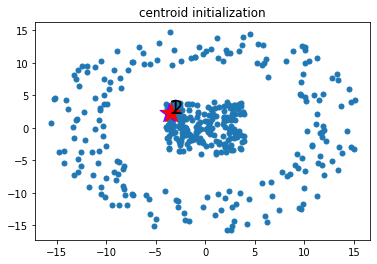

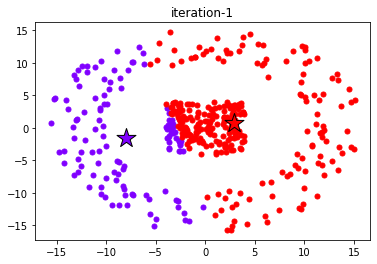

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

iter:  2
centroid:  [[-7.66604462 -1.29088   ]
 [ 3.15564259  0.72705407]]


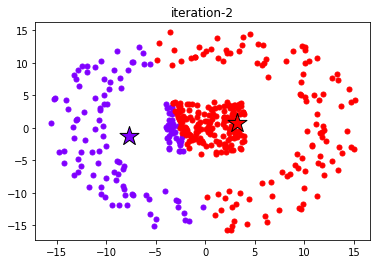

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

iter:  3
centroid:  [[-7.26628944 -0.98818239]
 [ 3.43895659  0.65431047]]


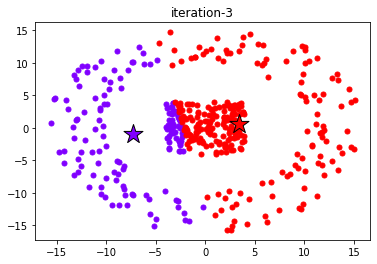

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

iter:  4
centroid:  [[-6.64196626 -0.63357546]
 [ 3.95813586  0.55596203]]


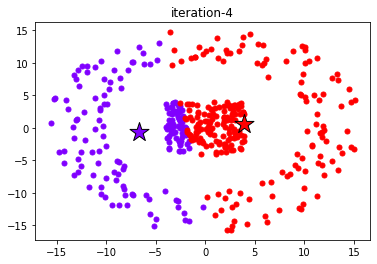

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

iter:  5
centroid:  [[-6.28391469 -0.36553446]
 [ 4.33941973  0.41789148]]


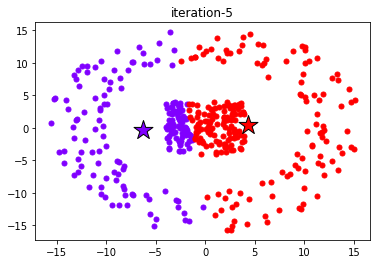

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

iter:  6
centroid:  [[-6.04900108 -0.24635054]
 [ 4.58201822  0.34724953]]


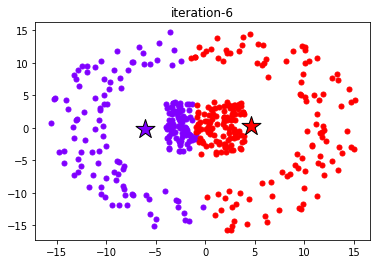

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

iter:  7
centroid:  [[-5.83576856 -0.18512835]
 [ 4.79406214  0.31264612]]


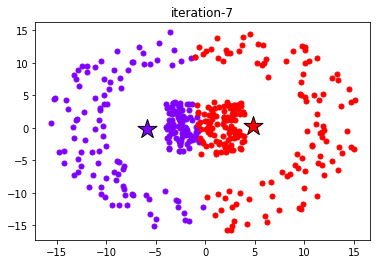

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

iter:  8
centroid:  [[-5.65484527 -0.15937164]
 [ 4.98523417  0.3041402 ]]


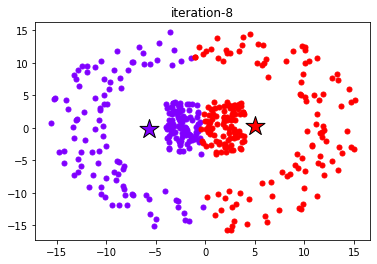

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

iter:  9
centroid:  [[-5.53207427 -0.07209369]
 [ 5.12909794  0.22340979]]


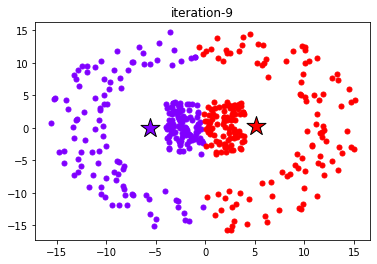

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


iter:  10
centroid:  [[-5.50860966 -0.01145459]
 [ 5.15917047  0.15990311]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


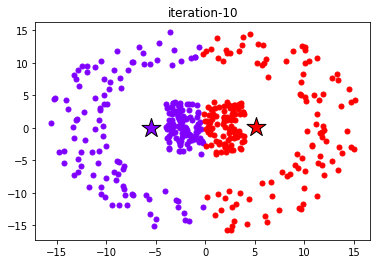

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

iter:  11
centroid:  [[-5.50860966 -0.01145459]
 [ 5.15917047  0.15990311]]


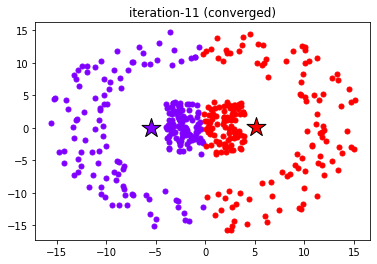

In [7]:
centroidInit = initCentroid(input, initCentroidMethod, k)
clusterResults, centroid = kMeans(input, centroidInit)
plotClusterResult(clusterResults, centroid, str(iterationCounter) + " (converged)", 1)